# Getting Started with Qiskit

Here, we provide the first step of working with Qiskit. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [1]:
import numpy as np
from qiskit import *

## Circuit Basics <a name='basics'></a>


### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of two qubits.

In [45]:
# Create a Quantum Circuit acting on a quantum register of two qubits
qc = QuantumCircuit(2)

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a two-qubit entangled state

$$|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a two-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the entangled state, we apply the following gates:
- A Hadamard gate $H$ on qubit $q_{0}$, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit $q_{0}$ and qubit $q_{1}$.

On an ideal quantum computer, the state produced by running this circuit would be the entangled state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [46]:
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
qc.cx(0, 1)

### Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

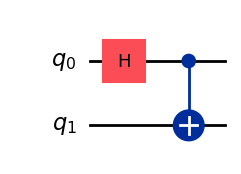

In [47]:
qc.draw('mpl')

In this circuit, the qubits are put in order, with qubit $q_{0}$ at the top and qubit $q_{1}$ at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

<div class="alert alert-block alert-info">


When representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labeled as $Q_{j}$. Qiskit uses an ordering in which the $n^{\mathrm{th}}$ qubit is on the <em><strong>left</strong></em> side of the tensor product, so that the basis vectors are labeled as  $Q_{n-1}\otimes \cdots  \otimes  Q_1\otimes Q_0$.

For example, if qubit $Q_{0}$ is in state 0, qubit $Q_{1}$ is in state 0, and qubit $Q_{2}$ is in state 1, Qiskit would represent this state as $|100\rangle$, whereas many physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices. For example, Qiskit represents a controlled-X ($C_{X}$) operation with qubit $Q_{0}$ being the control and qubit $Q_{1}$ being the target as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

</div>

## State visualization <a name='simulation'></a>



In [33]:
from qiskit.quantum_info import DensityMatrix,Statevector
from qiskit.visualization import plot_state_city

In [48]:
state = Statevector(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

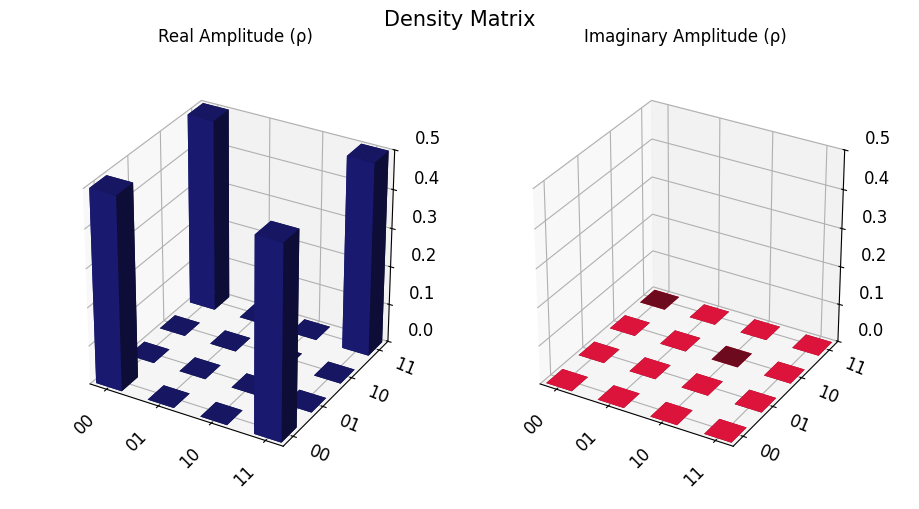

In [58]:
plot_state_city(state,color=['midnightblue', 'crimson'], title="Density Matrix",figsize=(9,5))

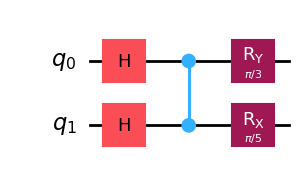

In [25]:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
qc.draw('mpl')

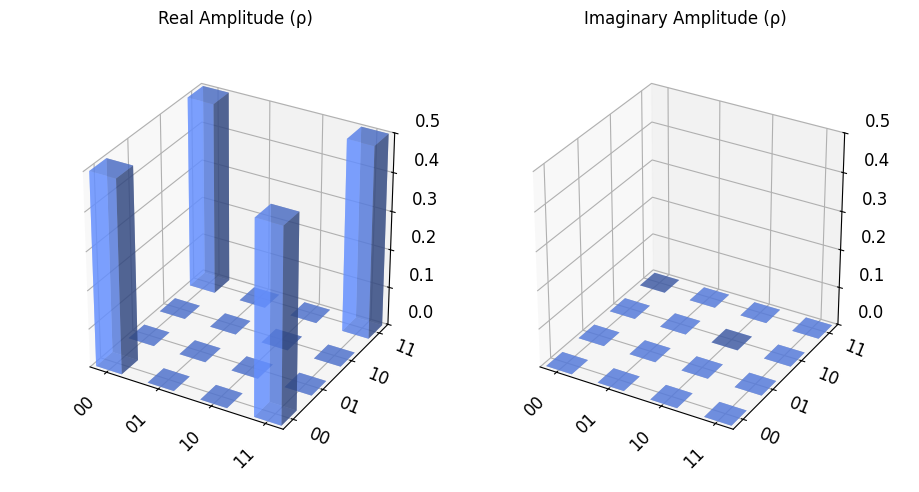

In [59]:
state = DensityMatrix(qc)
plot_state_city(state, alpha=0.6,figsize=(9,5))

The [circuit library](https://docs.quantum.ibm.com/api/qiskit/circuit_library) is a collection of well-studied and valuable circuits, directives, and gates. They can serve as any circuit construction.


## Result of a Quantum Circuit

To visualize the data from a quantum circuit run on a real device or a simulator we have made a simple function

Qiskit visualization https://docs.quantum.ibm.com/api/qiskit/visualization

In [89]:
#FAKE PROVIDER
#https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2,FakeAlgiers,FakeBelemV2
from qiskit.visualization import plot_histogram
backend = FakeBelemV2()
backend.num_qubits

5

In [2]:
from qiskit.visualization import plot_coupling_map
 
num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [2, 3], [3, 5], [4, 5], [5, 6], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

MissingOptionalLibraryError: "The 'Graphviz' library is required to use 'plot_coupling_map'.  To install, follow the instructions at https://graphviz.org/download/. Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install. You must install the actual Graphviz software."

In [134]:
new_circ = transpile(qc, backend=backend, optimization_level=1)
#plot_circuit_layout(new_circ, backend)
new_circ.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

In [128]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc)

TypeError: plot_circuit_layout() missing 1 required positional argument: 'backend'

In [126]:
backend.basis_gates()


AttributeError: 'FakeBelemV2' object has no attribute 'basis_gates'

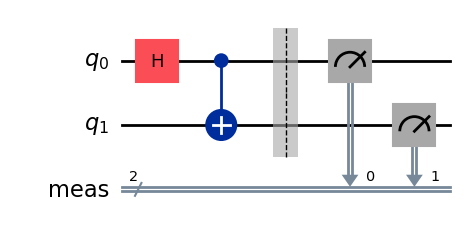

In [62]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

In [94]:
# from qiskit.primitives import StatevectorEstimator as Estimator
# from qiskit.primitives import StatevectorSampler as Sampler
# estimator = Estimator()
# sampler = Sampler()

# from qiskit.providers import Backend
# #backend = Backend()

# from qiskit.providers.basic_provider import BasicProvider
# backend = BasicProvider() 


In [95]:
result = backend.run(qc,shots=2000).result()
result = result

d:\Users\amherrera\AppData\Local\miniconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [98]:
job = backend.run([qc])
job_result = job.result()

d:\Users\amherrera\AppData\Local\miniconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [99]:
counts  = job_result.get_counts(qc)
print(counts)

{'11': 511, '00': 513}


In [100]:
result = backend.run(qc,shots=2000).result()
result = result
counts  = result.get_counts(qc)
print(counts)

{'00': 989, '11': 1011}


d:\Users\amherrera\AppData\Local\miniconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [101]:
backend.run(qc,shots=2000).num_shots()

d:\Users\amherrera\AppData\Local\miniconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


AttributeError: 'BasicProviderJob' object has no attribute 'num_shots'

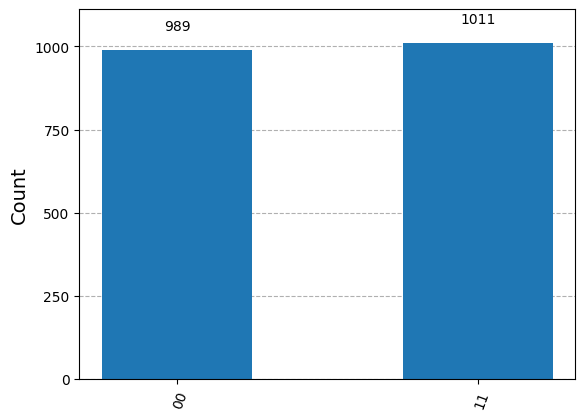

In [102]:

plot_histogram(counts)